In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from  scipy.stats import ttest_rel
import warnings
warnings.filterwarnings("ignore")

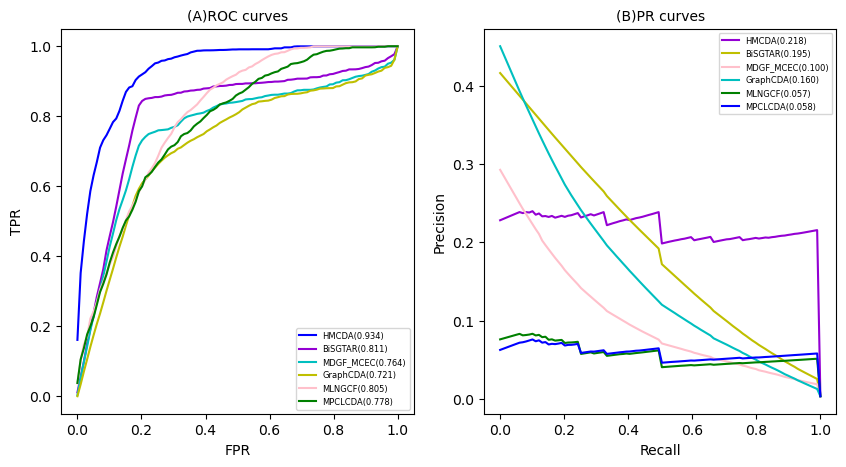

In [4]:
fpr_BiSGTAR,tpr_BiSGTAR,r_BiSGTAR,p_BiSGTAR=torch.load('BiSGTAR.pkl')
fpr_GraphCDA,tpr_GraphCDA,r_GraphCDA,p_GraphCDA=torch.load('GraphCDA.pkl')
fpr_MDGF_MCEC,tpr_MDGF_MCEC,r_MDGF_MCEC,p_MDGF_MCEC=torch.load('MDGF_MCEC.pkl')
fpr_MLNGCF,tpr_MLNGCF,r_MLNGCF,p_MLNGCF=torch.load('MLNGCF.pkl')
fpr_MPCLCDA,tpr_MPCLCDA,r_MPCLCDA,p_MPCLCDA=torch.load('MPCLCDA.pkl')
fpr_wbt,tpr_wbt,r_wbt,p_wbt=torch.load('HMCDA.pkl')
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(121)
a1, = plt.plot(fpr_wbt,tpr_wbt,'b')
a2, = plt.plot(fpr_BiSGTAR,tpr_BiSGTAR,'darkviolet')
a3, = plt.plot(fpr_MDGF_MCEC,tpr_MDGF_MCEC,'c')
a4, = plt.plot(fpr_GraphCDA,tpr_GraphCDA,'y')
a5, = plt.plot(fpr_MLNGCF,tpr_MLNGCF,'pink')
a6, = plt.plot(fpr_MPCLCDA,tpr_MPCLCDA,'g')
plt.legend([a1,a2,a3,a4,a5,a6],["HMCDA(%.3f)"%(auc(fpr_wbt,tpr_wbt)),
                                "BiSGTAR(%.3f)"%(auc(fpr_BiSGTAR,tpr_BiSGTAR)),
                                "MDGF_MCEC(%.3f)"%(auc(fpr_MDGF_MCEC,tpr_MDGF_MCEC)),
                                "GraphCDA(%.3f)"%(auc(fpr_GraphCDA,tpr_GraphCDA)),
                                "MLNGCF(%.3f)"%(auc(fpr_MLNGCF,tpr_MLNGCF)),
                                "MPCLCDA(%.3f)"%(auc(fpr_MPCLCDA,tpr_MPCLCDA))],loc="best",fontsize=6)
ax.set_title("(A)ROC curves",fontsize=10,)
plt.xlabel("FPR")
plt.ylabel("TPR")
ax1=plt.subplot(122)
a1, = plt.plot(r_wbt,p_wbt,'darkviolet')
a2, = plt.plot(r_BiSGTAR,p_BiSGTAR,'y')
a3, = plt.plot(r_MDGF_MCEC,p_MDGF_MCEC,'pink')
a4, = plt.plot(r_GraphCDA,p_GraphCDA,'c')
a5, = plt.plot(r_MLNGCF,p_MLNGCF,'g')
a6, = plt.plot(r_MPCLCDA,p_MPCLCDA,'b')
plt.legend([a1,a2,a3,a4,a5,a6],["HMCDA(%.3f)"%(auc(r_wbt,p_wbt)+r_wbt[0]*p_wbt[0]),
                                "BiSGTAR(%.3f)"%(auc(r_BiSGTAR,p_BiSGTAR)+r_BiSGTAR[0]*p_BiSGTAR[0]),
                                "MDGF_MCEC(%.3f)"%(auc(r_MDGF_MCEC,p_MDGF_MCEC)+r_MDGF_MCEC[0]*p_MDGF_MCEC[0]),
                                "GraphCDA(%.3f)"%(auc(r_GraphCDA,p_GraphCDA)+r_GraphCDA[0]*p_GraphCDA[0]),
                                "MLNGCF(%.3f)"%(auc(r_MLNGCF,p_MLNGCF)+r_MLNGCF[0]*p_MLNGCF[0]),
                                "MPCLCDA(%.3f)"%(auc(r_MPCLCDA,p_MPCLCDA)+r_MPCLCDA[0]*p_MPCLCDA[0])],loc="best",fontsize=6)
ax1.set_title("(B)PR curves",fontsize=10,)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(linewidth=15)
plt.show()
fig.savefig("AUCandAUPR.svg",format="svg")

In [9]:
auc_wbt,aupr_wbt=[0,0],[0,0]
auc_BiSGTAR,aupr_BiSGTAR=[0,0],[0,0]
auc_MDGF_MCEC,aupr_MDGF_MCEC=[0,0],[0,0]
auc_GraphCDA,aupr_GraphCDA=[0,0],[0,0]
auc_MLNGCF,aupr_MLNGCF=[0,0],[0,0]
auc_MPCLCDA,aupr_MPCLCDA=[0,0],[0,0]
for i in range(2,100):
    auc_wbt.append((auc(fpr_wbt[:i],tpr_wbt[:i])).item())
    aupr_wbt.append((auc(r_wbt[:i],p_wbt[:i])+r_wbt[0]*p_wbt[0]).item())

    auc_BiSGTAR.append((auc(fpr_BiSGTAR[:i],tpr_BiSGTAR[:i])).item())
    aupr_BiSGTAR.append((auc(r_BiSGTAR[:i],p_BiSGTAR[:i])+r_BiSGTAR[0]*p_BiSGTAR[0]).item())

    auc_MDGF_MCEC.append((auc(fpr_MDGF_MCEC[:i],tpr_MDGF_MCEC[:i])).item())
    aupr_MDGF_MCEC.append((auc(r_MDGF_MCEC[:i],p_MDGF_MCEC[:i])+r_MDGF_MCEC[0]*p_MDGF_MCEC[0]).item())

    auc_GraphCDA.append((auc(fpr_GraphCDA[:i],tpr_GraphCDA[:i])).item())
    aupr_GraphCDA.append((auc(r_GraphCDA[:i],p_GraphCDA[:i])+r_GraphCDA[0]*p_GraphCDA[0]).item())

    auc_MLNGCF.append((auc(fpr_MLNGCF[:i],tpr_MLNGCF[:i])).item())
    aupr_MLNGCF.append((auc(r_MLNGCF[:i],p_MLNGCF[:i])+r_MLNGCF[0]*p_MLNGCF[0]).item())

    auc_MPCLCDA.append((auc(fpr_MPCLCDA[:i],tpr_MPCLCDA[:i])).item())
    aupr_MPCLCDA.append((auc(r_MPCLCDA[:i],p_MPCLCDA[:i])+r_MPCLCDA[0]*p_MPCLCDA[0]).item())

In [10]:
topk_wbt=[]
topk_BiSGTAR=[]
topk_MDGF_MCEC=[]
topk_GraphCDA=[]
topk_MLNGCF=[]
topk_MPCLCDA=[]
for i in range(5):
    topk_wbt.append(torch.argwhere(torch.tensor(aupr_wbt)>=(aupr_wbt[-1]-aupr_wbt[0])*0.2*(i+1))[0])
    topk_BiSGTAR.append(torch.argwhere(torch.tensor(aupr_BiSGTAR)>=(aupr_BiSGTAR[-1]-aupr_BiSGTAR[0])*0.2*(i+1))[0])
    topk_MDGF_MCEC.append(torch.argwhere(torch.tensor(aupr_MDGF_MCEC)>=(aupr_MDGF_MCEC[-1]-aupr_MDGF_MCEC[0])*0.2*(i+1))[0])
    topk_GraphCDA.append(torch.argwhere(torch.tensor(aupr_GraphCDA)>=(aupr_GraphCDA[-1]-aupr_GraphCDA[0])*0.2*(i+1))[0])
    print(topk_MDGF_MCEC)
    print(topk_GraphCDA)
    topk_MLNGCF.append(torch.argwhere(torch.tensor(aupr_MLNGCF)>=(aupr_MLNGCF[-1]-aupr_MLNGCF[0])*0.2*(i+1))[0])
    topk_MPCLCDA.append(torch.argwhere(torch.tensor(aupr_MPCLCDA)>=(aupr_MPCLCDA[-1]-aupr_MPCLCDA[0])*0.2*(i+1))[0])
# topk_wbt=[]
# topk_BiSGTAR=[]
# topk_MDGF_MCEC=[]
# topk_GraphCDA=[]
# topk_MLNGCF=[]
# topk_MPCLCDA=[]
# for i in range(5):
#     topk_wbt.append(torch.argwhere(torch.tensor(aupr_wbt)>=(aupr_wbt[-1]-aupr_wbt[0])*0.1*(i+1))[0])
#     topk_BiSGTAR.append(torch.argwhere(torch.tensor(aupr_BiSGTAR)>=(aupr_BiSGTAR[-1]-aupr_BiSGTAR[0])*0.1*(i+1))[0])
#     topk_MDGF_MCEC.append(torch.argwhere(torch.tensor(aupr_MDGF_MCEC)>=(aupr_MDGF_MCEC[-1]-aupr_MDGF_MCEC[0])*0.1*(i+1))[0])
#     topk_GraphCDA.append(torch.argwhere(torch.tensor(aupr_GraphCDA)>=(aupr_GraphCDA[-1]-aupr_GraphCDA[0])*0.1*(i+1))[0])
#     print(topk_MDGF_MCEC)
#     print(topk_GraphCDA)
#     topk_MLNGCF.append(torch.argwhere(torch.tensor(aupr_MLNGCF)>=(aupr_MLNGCF[-1]-aupr_MLNGCF[0])*0.1*(i+1))[0])
#     topk_MPCLCDA.append(torch.argwhere(torch.tensor(aupr_MPCLCDA)>=(aupr_MPCLCDA[-1]-aupr_MPCLCDA[0])*0.1*(i+1))[0])

[tensor([5])]
[tensor([5])]
[tensor([5]), tensor([9])]
[tensor([5]), tensor([9])]
[tensor([5]), tensor([9]), tensor([13])]
[tensor([5]), tensor([9]), tensor([14])]
[tensor([5]), tensor([9]), tensor([13]), tensor([18])]
[tensor([5]), tensor([9]), tensor([14]), tensor([19])]
[tensor([5]), tensor([9]), tensor([13]), tensor([18]), tensor([25])]
[tensor([5]), tensor([9]), tensor([14]), tensor([19]), tensor([24])]


[0.11111111111111112, 0.20202020202020204, 0.29292929292929293, 0.38383838383838387, 0.48484848484848486]
[0.06060606060606061, 0.11111111111111112, 0.17171717171717174, 0.23232323232323235, 0.29292929292929293]
[0.05050505050505051, 0.09090909090909091, 0.13131313131313133, 0.18181818181818182, 0.25252525252525254]
[0.05050505050505051, 0.09090909090909091, 0.14141414141414144, 0.19191919191919193, 0.24242424242424243]
[0.08080808080808081, 0.15151515151515152, 0.23232323232323235, 0.32323232323232326, 0.4141414141414142]
[0.10101010101010102, 0.18181818181818182, 0.26262626262626265, 0.36363636363636365, 0.4545454545454546]


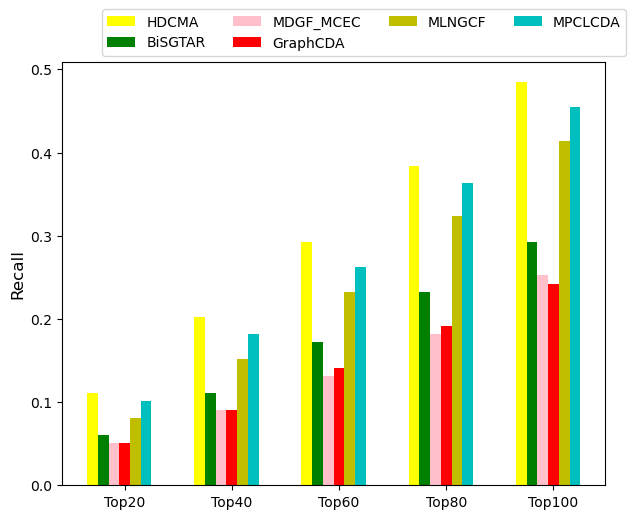

In [11]:
fig = plt.figure(figsize=(7,5),dpi=100)#
ax2 = fig.add_subplot(1,1,1)
size = 5
x = np.arange(size)
total_width, n = 0.5, 5 
width = total_width / n
x = x - (total_width - width) / 2
ax2.set_xticks(x)
a = [r_wbt[i] for i in topk_wbt]
b = [r_BiSGTAR[i] for i in topk_BiSGTAR]
c = [r_MDGF_MCEC[i] for i in topk_MDGF_MCEC]
d = [r_GraphCDA[i] for i in topk_GraphCDA]
e = [r_MLNGCF[i] for i in topk_MLNGCF]
f = [r_MPCLCDA[i] for i in topk_MPCLCDA]
a_data = [item.item() for item in a]
b_data = [item.item() for item in b]
c_data = [item.item() for item in c]
d_data = [item.item() for item in d]
e_data = [item.item() for item in e]
f_data = [item.item() for item in f]
print(a_data)
print(b_data)
print(c_data)
print(d_data)
print(e_data)
print(f_data)
plt.bar(x - 0.3,a_data, width=width, label='HDCMA', color='yellow')
plt.bar(x - 0.3 + 1*width, b_data, width=width, label='BiSGTAR', color='green') 
plt.bar(x - 0.3 + 2*width, c_data, width=width, label='MDGF_MCEC', color='pink') 
plt.bar(x - 0.3 + 3 *width, d_data, width=width, label='GraphCDA', color='r') 
plt.bar(x - 0.3 + 4 * width, e_data, width=width, label='MLNGCF', color='y') 
plt.bar(x - 0.3 + 5 * width, f_data, width=width, label="MPCLCDA", color='c')
ax2.set_xticklabels(['Top20', 'Top40', 'Top60', 'Top80', 'Top100',  ])
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width, box.height * 1.1])
ax2.legend(loc='upper left', bbox_to_anchor=(0.06, 1.14),ncol=4)
#plt.legend(loc='NorthOutside')
plt.ylabel("Recall",fontsize='large')
plt.show()
fig.savefig(rf"E:\CompareMethods\plt\top_k.svg",format="svg",bbox_inches='tight')

In [12]:
auc1 = ttest_rel(auc_wbt, auc_BiSGTAR)
aupr1 = ttest_rel(aupr_wbt, aupr_BiSGTAR)
print("BiSGTAR:")
print(auc1,aupr1)
auc2 = ttest_rel(auc_wbt, auc_MDGF_MCEC)
aupr2 = ttest_rel(aupr_wbt, aupr_MDGF_MCEC)
print("MDGF_MCEC:")
print(auc2,aupr2)
auc3 = ttest_rel(auc_wbt, auc_GraphCDA)
aupr3 = ttest_rel(aupr_wbt, aupr_GraphCDA)
print("GraphCDA:")
print(auc3,aupr3)
auc4 = ttest_rel(auc_wbt, auc_MLNGCF)
aupr4 = ttest_rel(aupr_wbt, aupr_MLNGCF)
print("MLNGCF:")
print(auc4,aupr4)
auc5 = ttest_rel(auc_wbt, auc_MPCLCDA)
aupr5 = ttest_rel(aupr_wbt, aupr_MPCLCDA)
print("MPCLCDA:")
print(auc5,aupr5)

BiSGTAR:
TtestResult(statistic=23.79957740478084, pvalue=9.505113429686686e-43, df=99) TtestResult(statistic=-11.57423293360484, pvalue=4.200532801780799e-20, df=99)
MDGF_MCEC:
TtestResult(statistic=21.607237200473346, pvalue=2.939294818338431e-39, df=99) TtestResult(statistic=11.101352545167353, pvalue=4.404641939707698e-19, df=99)
GraphCDA:
TtestResult(statistic=21.594602725895786, pvalue=3.0834208979513795e-39, df=99) TtestResult(statistic=-0.47976212165676296, pvalue=0.6324547862647465, df=99)
MLNGCF:
TtestResult(statistic=25.373081123518656, pvalue=4.068239968192642e-45, df=99) TtestResult(statistic=16.580396111595, pvalue=2.513490799472037e-30, df=99)
MPCLCDA:
TtestResult(statistic=23.323963164364784, pvalue=5.1976686936159223e-42, df=99) TtestResult(statistic=16.98212978991531, pvalue=4.326032245994044e-31, df=99)
